In [ ]:
from osgeo import gdal
import numpy as np

dem_file_path = "/content/D60624ne.pix"

In [ ]:
dem_dataset = gdal.Open(dem_file_path)
if dem_dataset is None:
    print("Could not open the DEM file.")
    exit()

dem_array = dem_dataset.GetRasterBand(1).ReadAsArray()

# Hillshade map

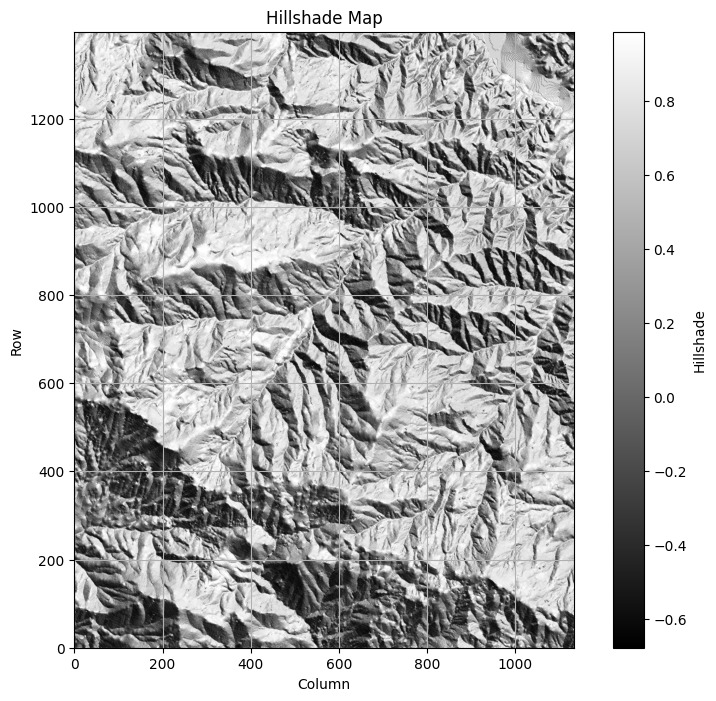

In [ ]:
azimuth = 315.0  # زاویه‌ی آزیموت نور (به درجه)
angle_altitude = 45.0  # زاویه‌ی ارتفاع نور (به درجه)

# محاسبه Hillshade
x, y = np.gradient(dem_array)
slope = np.pi/2. - np.arctan(np.sqrt(x**2 + y**2))
aspect = np.arctan2(-x, y)
azimuthrad = azimuth*np.pi / 180.
altituderad = angle_altitude*np.pi / 180.
shaded = np.sin(altituderad) * np.sin(slope) + np.cos(altituderad) * np.cos(slope) * np.cos((azimuthrad - np.pi/2.) - aspect)

# نمایش نقشه Hillshade
plt.figure(figsize=(10, 8))
plt.imshow(shaded, cmap='gray', extent=(0, dem_array.shape[1], 0, dem_array.shape[0]))
plt.colorbar(label='Hillshade')
plt.title('Hillshade Map')
plt.xlabel('Column')
plt.ylabel('Row')
plt.grid(True)
plt.show()